# Load Dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv


In [2]:
df = pd.read_csv('/kaggle/input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# Exploratory Data Analysis

In [3]:
df.shape

(12330, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
categorical_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 
                   'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

numerical_cols = ['Administrative', 'Administrative_Duration', 'Informational', 
                 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

## Distribution Analysis 

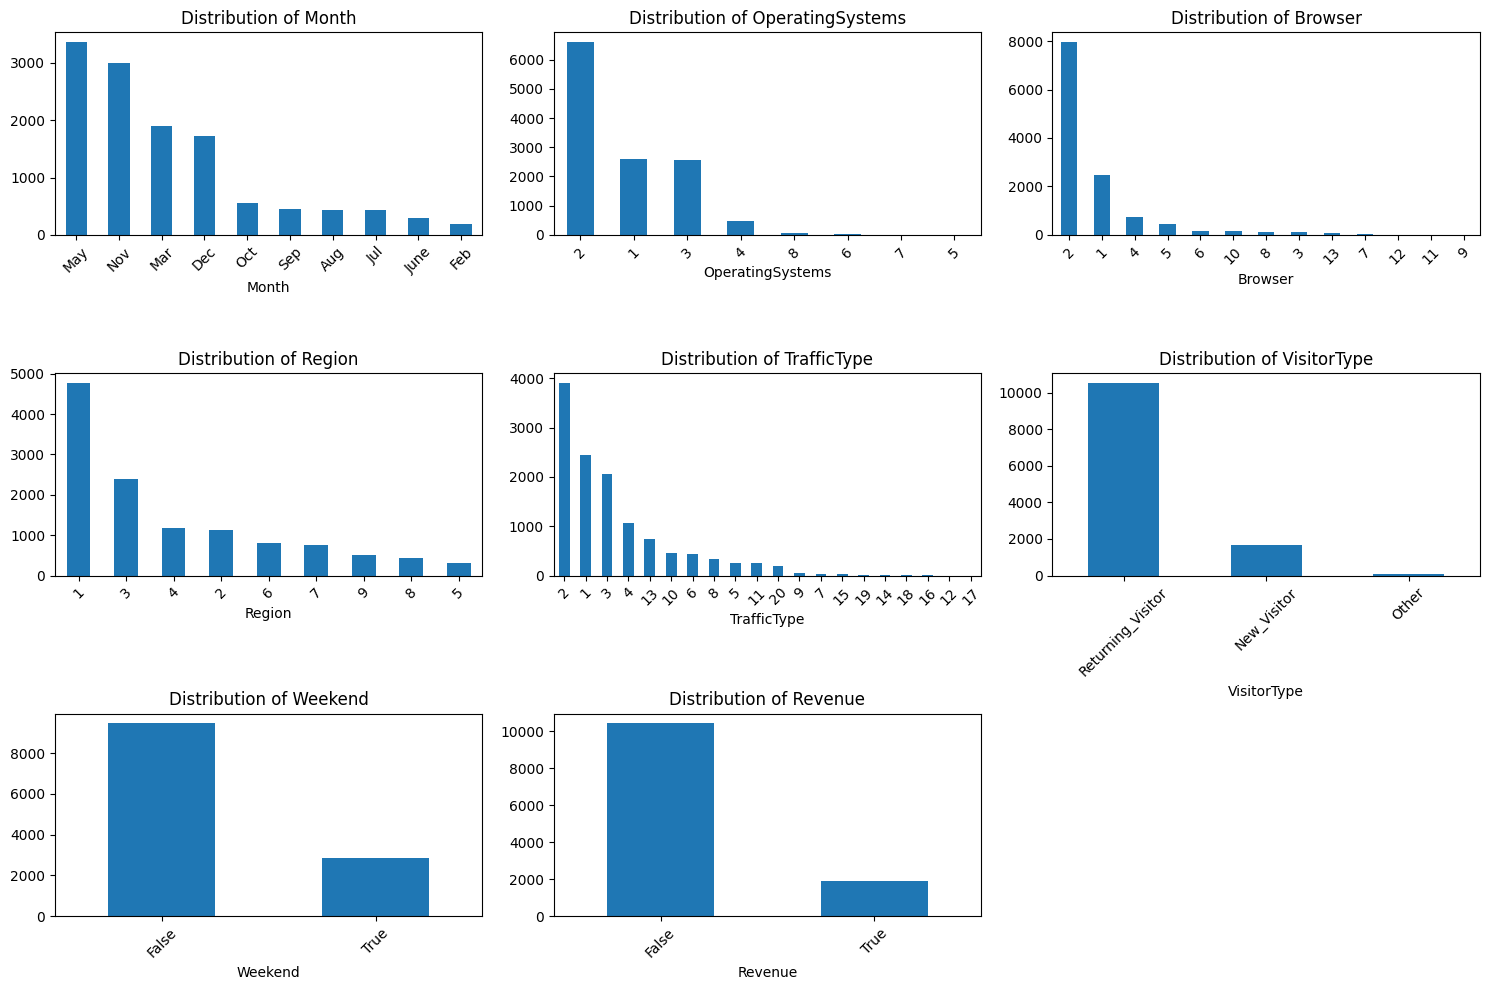

In [8]:
# Analisis distribusi categorical column
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        df[col].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].tick_params(axis='x', rotation=45)

for i in range(len(categorical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

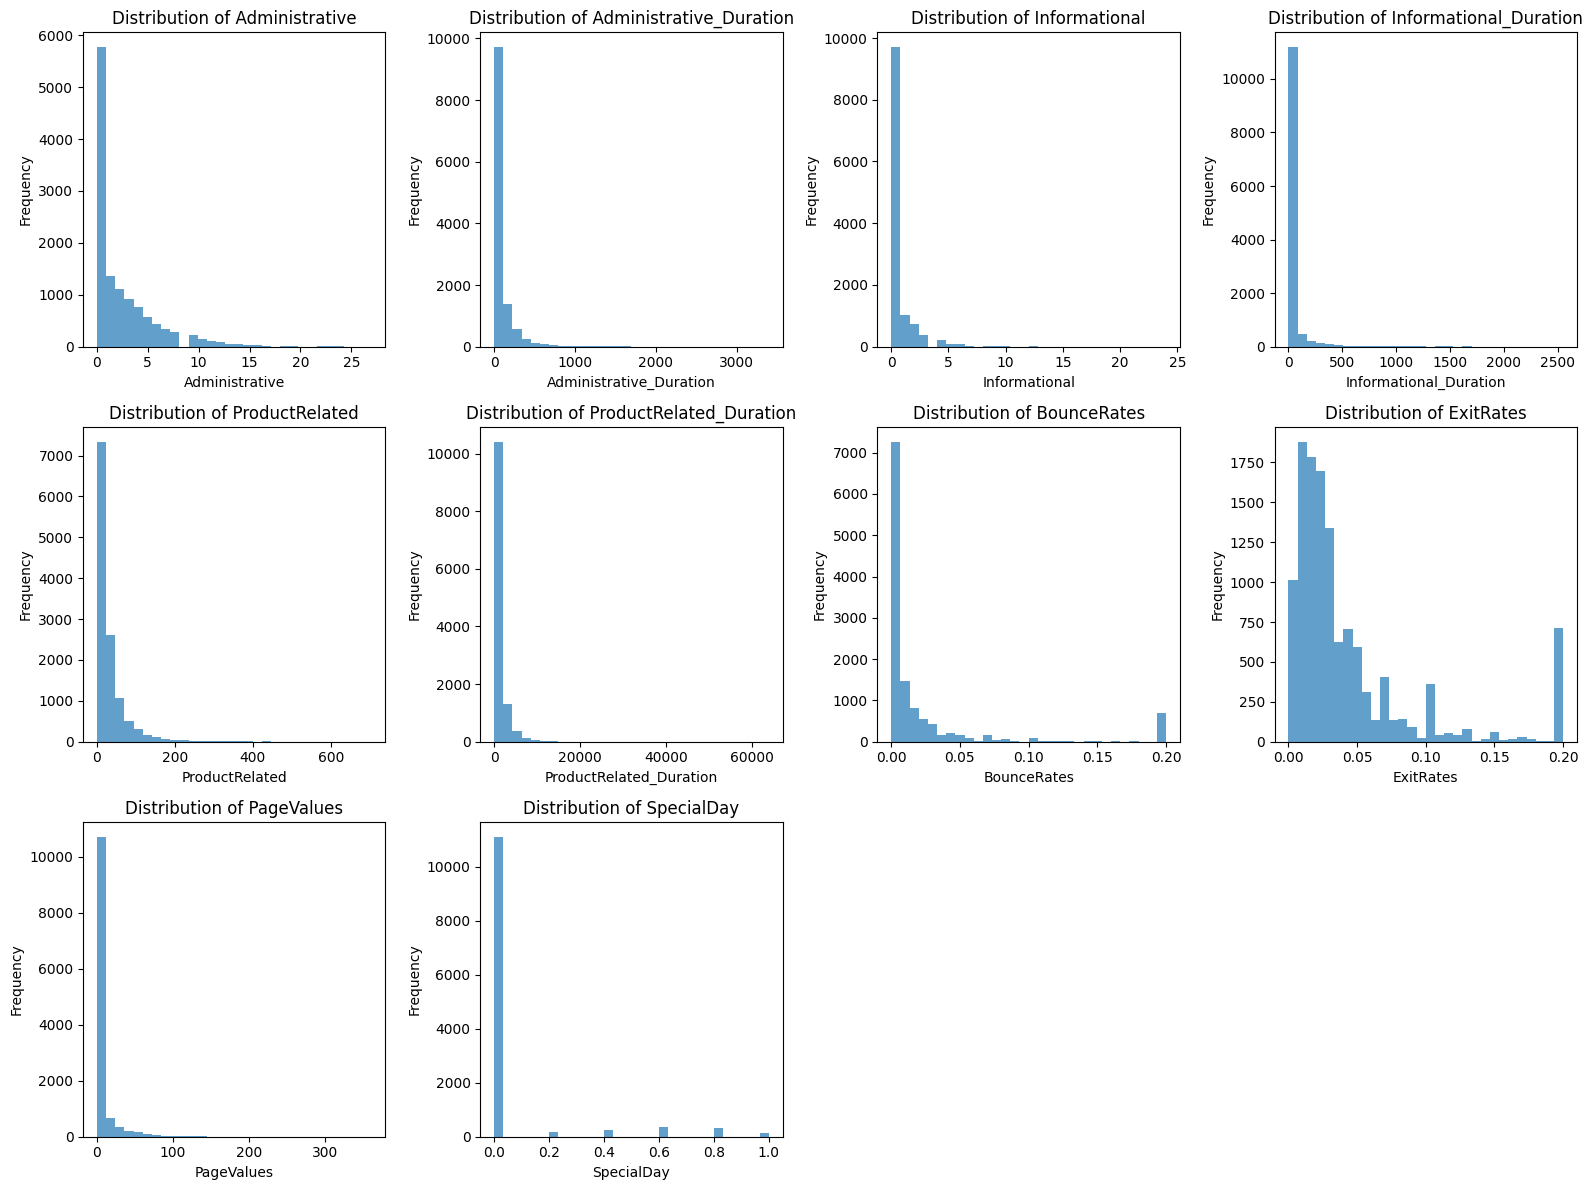

In [9]:
# Analisis distribusi numerical features
numerical_cols_except_revenue = [col for col in numerical_cols if col != 'Revenue']

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols_except_revenue):
    if i < len(axes):
        axes[i].hist(df[col], bins=30, alpha=0.7)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

for i in range(len(numerical_cols_except_revenue), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

## Target Variable Analysis

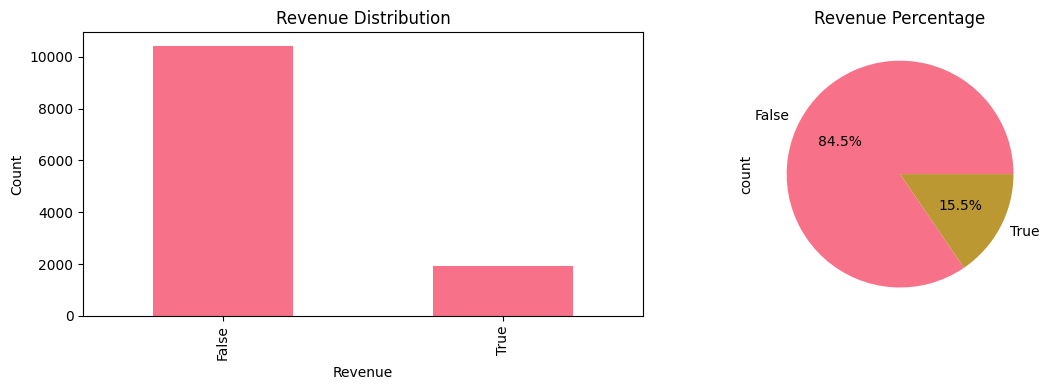

Revenue Distribution:
Revenue
False    10422
True      1908
Name: count, dtype: int64

Revenue Percentage:
Revenue
False    84.525547
True     15.474453
Name: proportion, dtype: float64


In [10]:
# Analisis distribusi Revenue
plt.style.use('default')
sns.set_palette("husl")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df['Revenue'].value_counts().plot(kind='bar')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['Revenue'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Revenue Percentage')

plt.tight_layout()
plt.show()

print("Revenue Distribution:")
print(df['Revenue'].value_counts())
print("\nRevenue Percentage:")
print(df['Revenue'].value_counts(normalize=True) * 100)

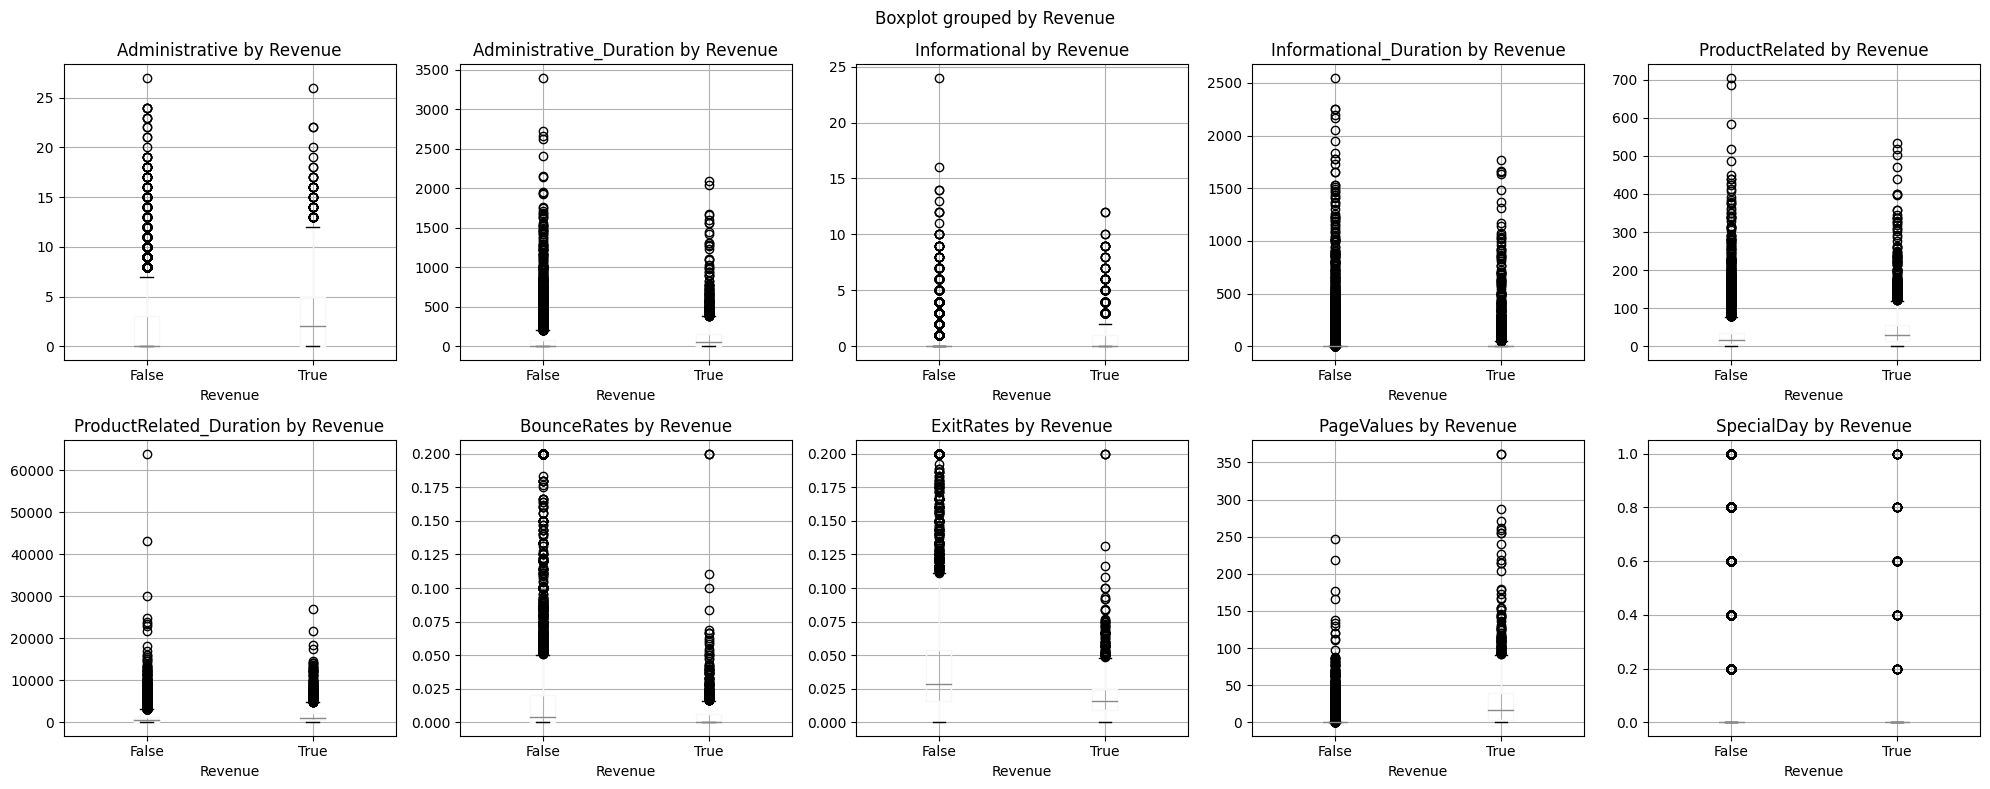

In [11]:
# Analisis numerical features berdasarkan Revenue
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        df.boxplot(column=col, by='Revenue', ax=axes[i])
        axes[i].set_title(f'{col} by Revenue')
        axes[i].set_xlabel('Revenue')

plt.tight_layout()
plt.show()

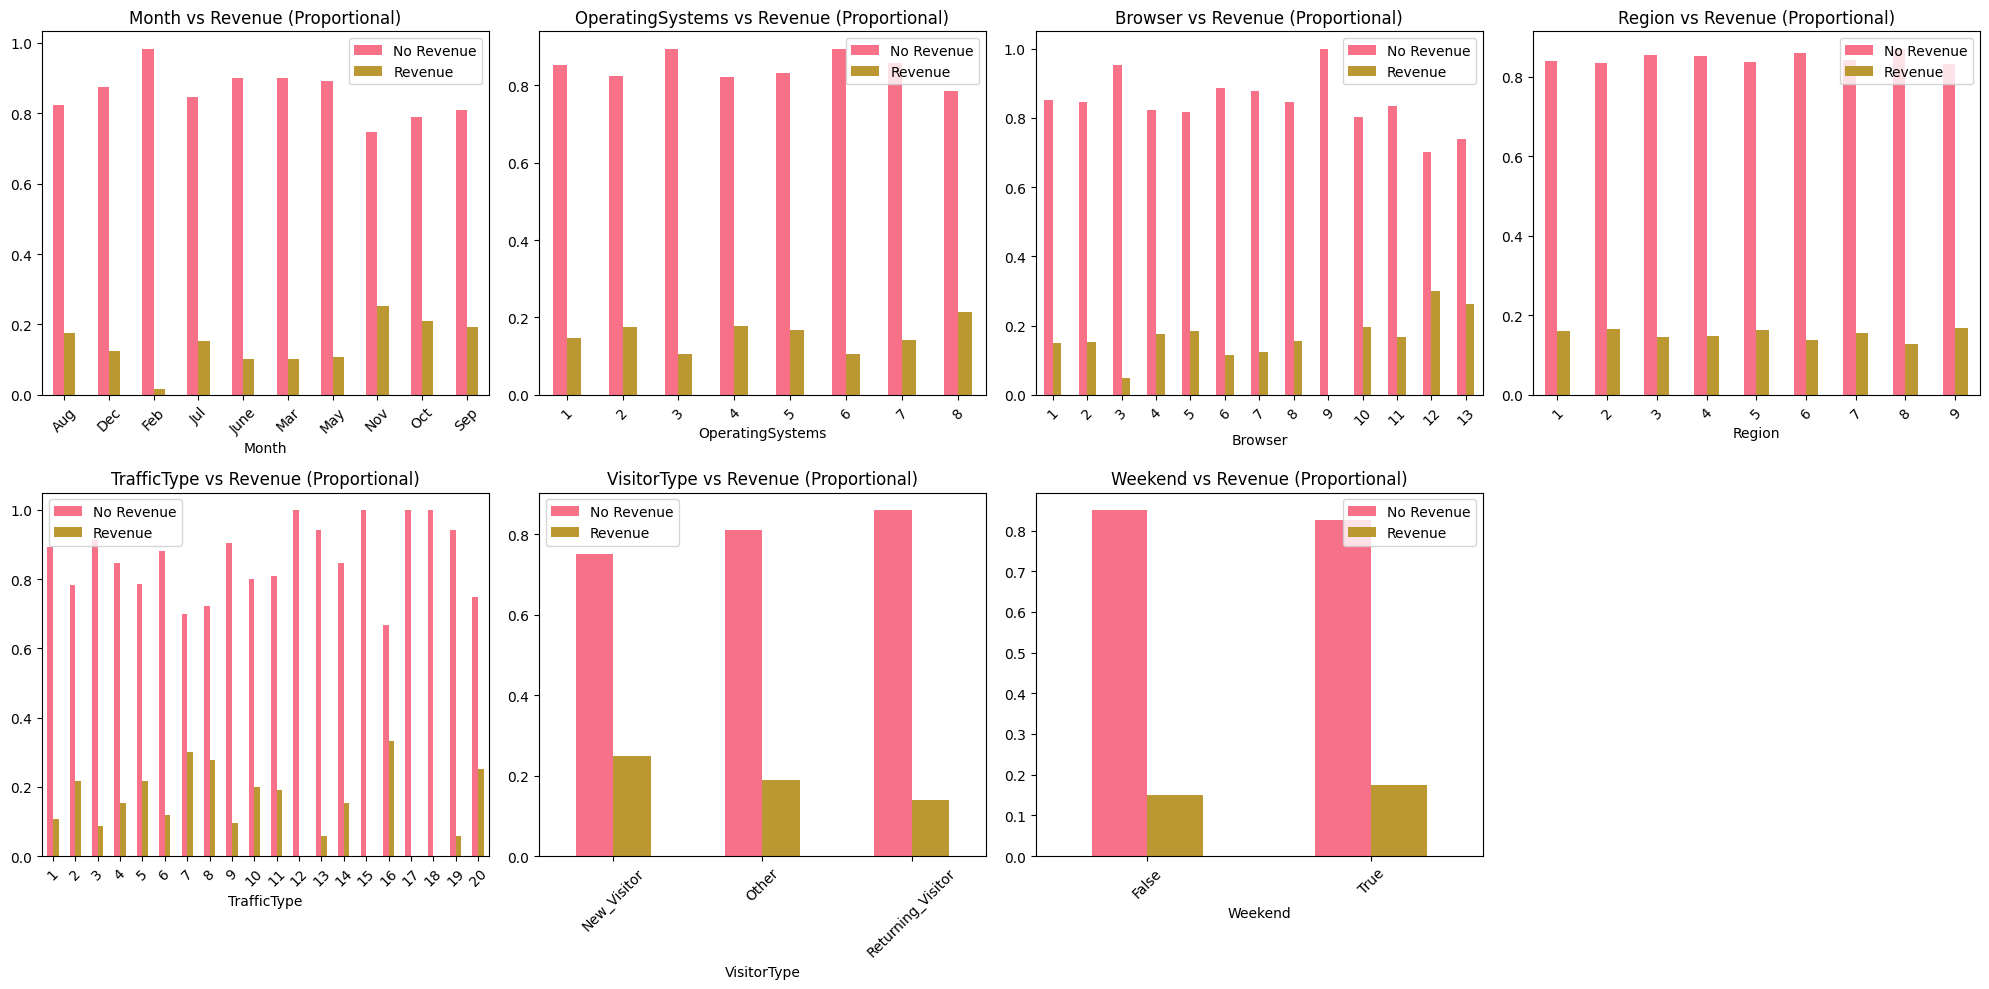

In [12]:
# Analisis categorical features berdasarkan Revenue
categorical_cols_no_revenue = [col for col in categorical_cols if col != 'Revenue']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(categorical_cols_no_revenue):
    if i < len(axes):
        pd.crosstab(df[col], df['Revenue'], normalize='index').plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'{col} vs Revenue (Proportional)')
        axes[i].legend(['No Revenue', 'Revenue'])
        axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots
for i in range(len(categorical_cols_no_revenue), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

## Correlation Analysis

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


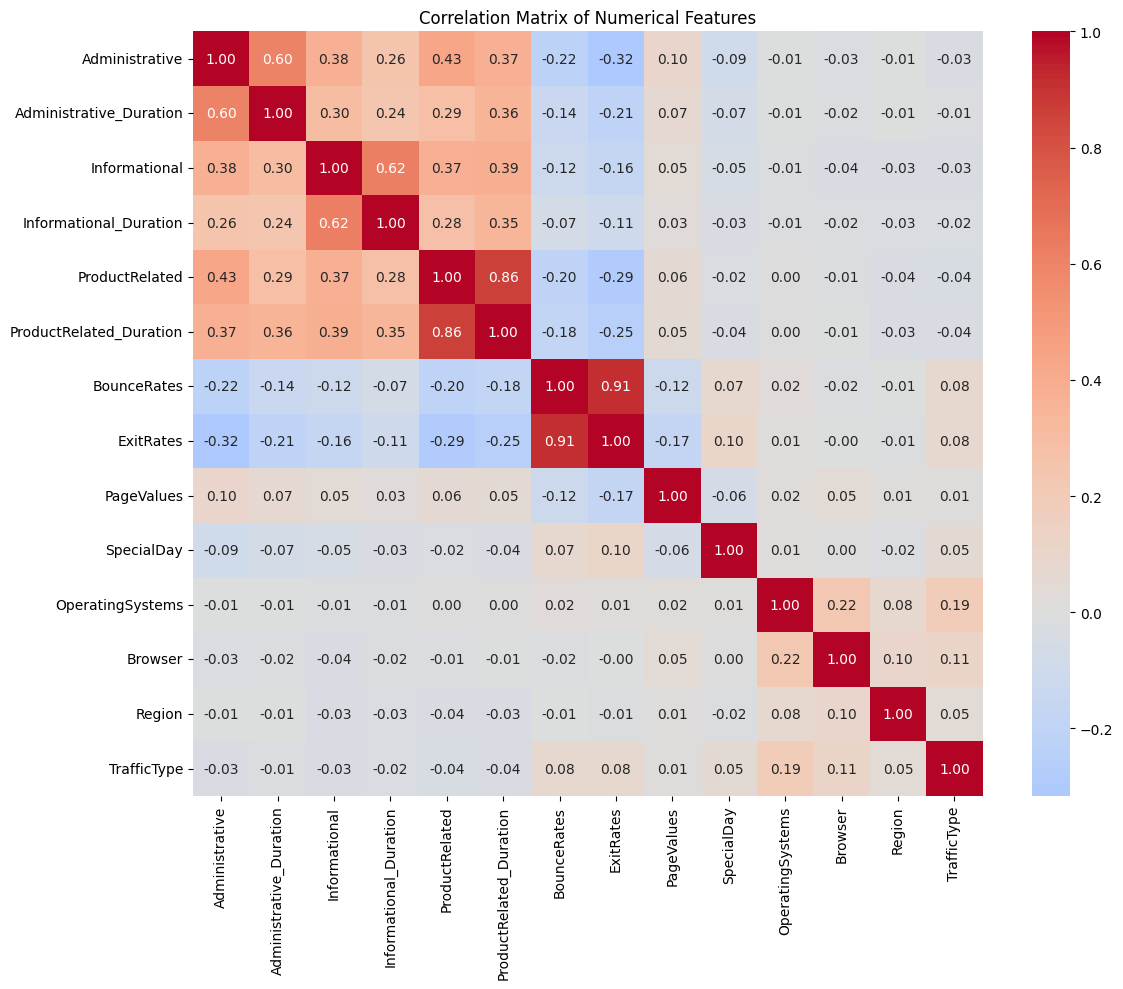

In [13]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

## Outlier Detection

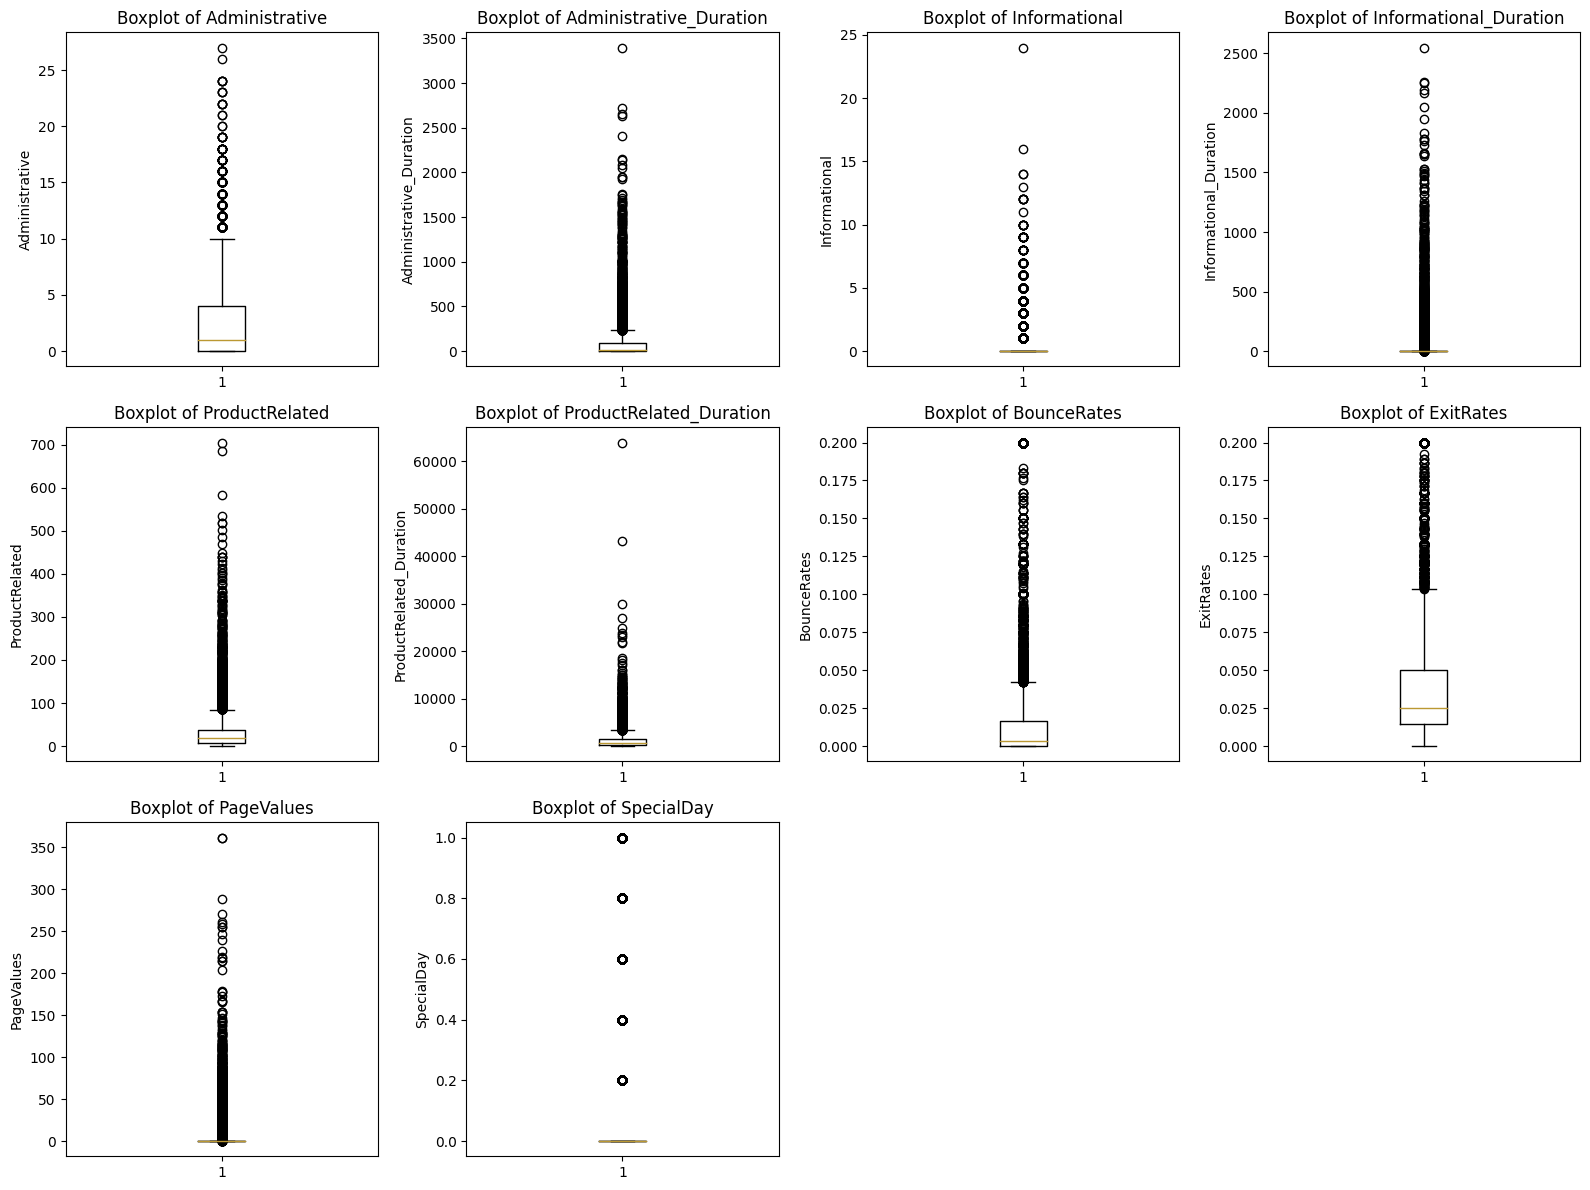

In [14]:
# Outlier detection
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        axes[i].boxplot(df[col])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_ylabel(col)

# Hide unused subplots
for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

## Session Behavior Analysis

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

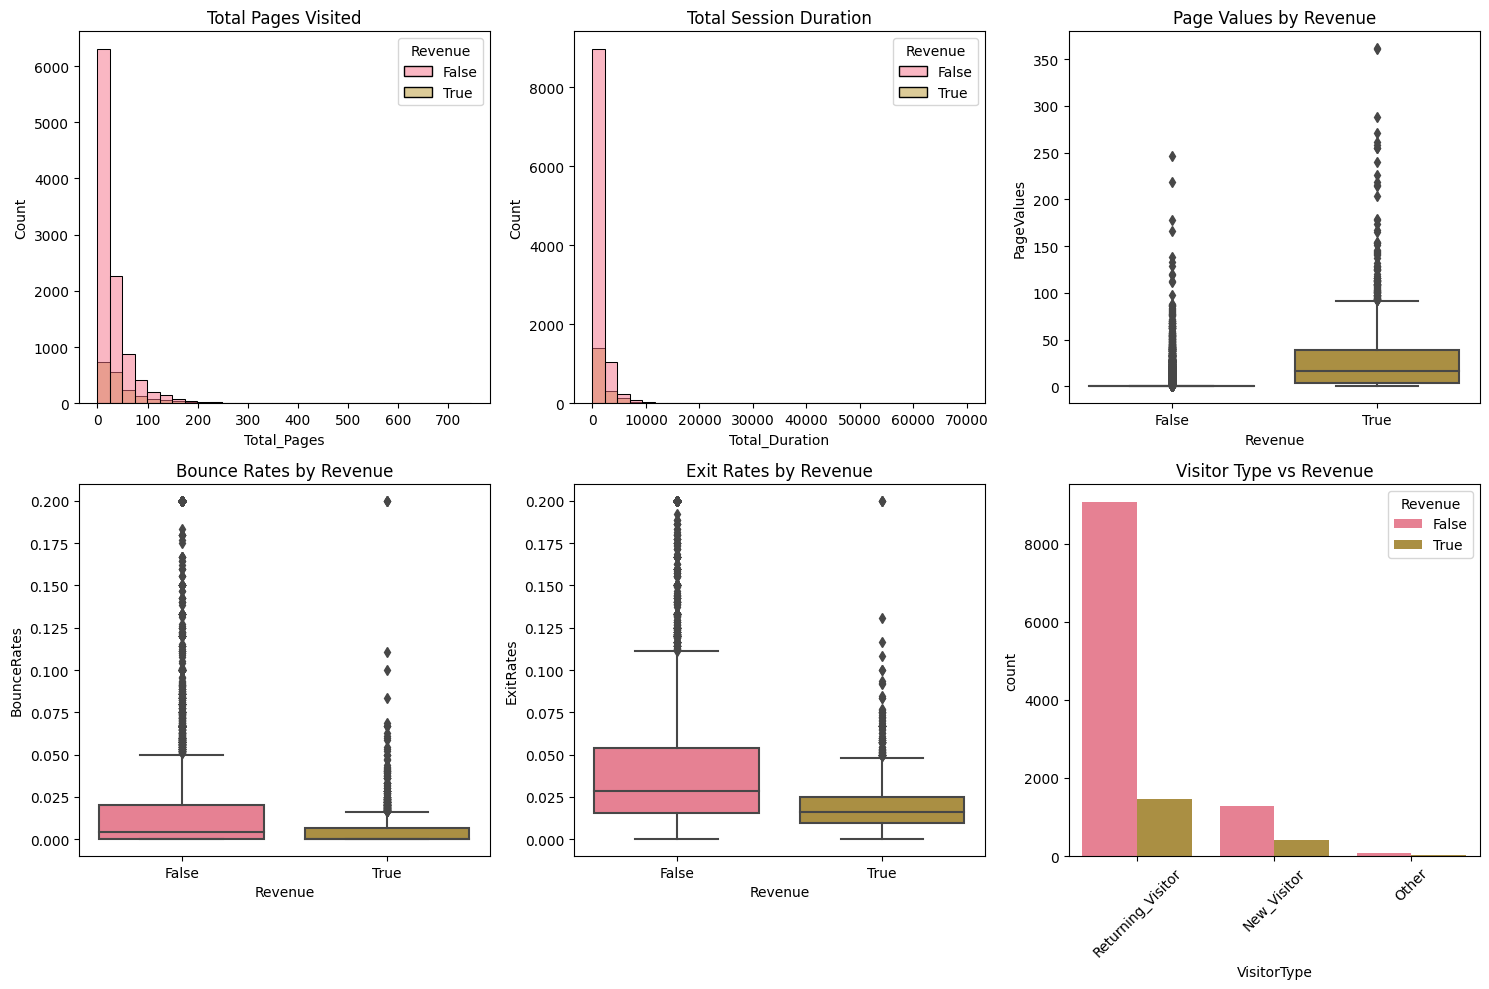

In [15]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
df['Total_Pages'] = df['Administrative'] + df['Informational'] + df['ProductRelated']
sns.histplot(data=df, x='Total_Pages', hue='Revenue', bins=30)
plt.title('Total Pages Visited')

plt.subplot(2, 3, 2)
df['Total_Duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
sns.histplot(data=df, x='Total_Duration', hue='Revenue', bins=30)
plt.title('Total Session Duration')

plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='Revenue', y='PageValues')
plt.title('Page Values by Revenue')

plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Revenue', y='BounceRates')
plt.title('Bounce Rates by Revenue')

plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='Revenue', y='ExitRates')
plt.title('Exit Rates by Revenue')

plt.subplot(2, 3, 6)
sns.countplot(data=df, x='VisitorType', hue='Revenue')
plt.title('Visitor Type vs Revenue')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Data Preprocessing

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

## Encoding Categorical Variables

In [18]:
# Label Encoding for VisitorType
le = LabelEncoder()
df['VisitorType'] = le.fit_transform(df['VisitorType'])

## Feature Engineering

In [19]:
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
df['Month_num'] = df['Month'].map(month_map)

df['Month_sin'] = np.sin(2 * np.pi * df['Month_num'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month_num'] / 12)

df.drop(['Month', 'Month_num'], axis=1, inplace=True)

In [20]:
updated_numerical_cols = ['Administrative', 'Administrative_Duration', 'Informational', 
                         'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                         'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
                         'Month_sin', 'Month_cos'] 

for col in updated_numerical_cols:
    p1 = df[col].quantile(0.01)
    p99 = df[col].quantile(0.99)
    
    outliers_before = len(df[(df[col] < p1) | (df[col] > p99)])
    df[col] = df[col].clip(lower=p1, upper=p99)
    
    if outliers_before > 0:
        print(f"{col}: {outliers_before} outliers handled")

print("All outliers handled using 1st-99th percentile winsorization")

Administrative: 113 outliers handled
Administrative_Duration: 124 outliers handled
Informational: 83 outliers handled
Informational_Duration: 124 outliers handled
ProductRelated: 160 outliers handled
ProductRelated_Duration: 124 outliers handled
ExitRates: 122 outliers handled
PageValues: 124 outliers handled
All outliers handled using 1st-99th percentile winsorization


In [21]:
X = df.drop('Revenue', axis=1)  # Features
y = df['Revenue']               # Target

## Scaling Features

In [22]:
scaler = StandardScaler()
X[updated_numerical_cols] = scaler.fit_transform(X[updated_numerical_cols])

## Split Data

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40, stratify=y
)

In [24]:
print(f"Final feature shape: {X.shape}")
print(f"Features: {X.columns.tolist()}")

Final feature shape: (12330, 20)
Features: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Total_Pages', 'Total_Duration', 'Month_sin', 'Month_cos']


## SMOTE

In [25]:
class_counts = y_train.value_counts()
print(f"Training Set Distribution:")
print(f"  Class 0 (No Purchase): {class_counts[0]:,} ({class_counts[0]/len(y_train)*100:.1f}%)")
print(f"  Class 1 (Purchase): {class_counts[1]:,} ({class_counts[1]/len(y_train)*100:.1f}%)")

imbalance_ratio = class_counts[0] / class_counts[1]
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 3:
    print("⚠️  Significant class imbalance detected! Applying SMOTE...")
    apply_smote = True
else:
    print("✅ Mild imbalance, SMOTE optional.")
    apply_smote = False

Training Set Distribution:
  Class 0 (No Purchase): 8,338 (84.5%)
  Class 1 (Purchase): 1,526 (15.5%)

Imbalance Ratio: 5.46:1
⚠️  Significant class imbalance detected! Applying SMOTE...


In [26]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [27]:
try:
    from sklearn.utils import _metadata_requests
    print("Sukses! Versi scikit-learn ≥ 1.3")
except ImportError:
    print("Gagal. Perlu upgrade scikit-learn!")

Sukses! Versi scikit-learn ≥ 1.3


In [28]:
if apply_smote:
    from imblearn.over_sampling import SMOTE
    
    smote = SMOTE(random_state=40)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    print(f"\nAfter SMOTE - Training set:")
    print(f"  Class 0: {sum(y_train_smote == 0):,} ({sum(y_train_smote == 0)/len(y_train_smote)*100:.1f}%)")
    print(f"  Class 1: {sum(y_train_smote == 1):,} ({sum(y_train_smote == 1)/len(y_train_smote)*100:.1f}%)")
    print(f"  Total samples: {len(y_train):,} → {len(y_train_smote):,}")
else:
    X_train_smote, y_train_smote = X_train.copy(), y_train.copy()
    print("Using original training data (no SMOTE applied)")


After SMOTE - Training set:
  Class 0: 8,338 (50.0%)
  Class 1: 8,338 (50.0%)
  Total samples: 9,864 → 16,676


# Model Machine Learning

In [29]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

models = {
    'Logistic Regression': LogisticRegression(random_state=40, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=40, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=40, n_estimators=100),
    # Skip SVM untuk menghindari masalah performance
    # 'SVM': SVC(random_state=40, probability=True, kernel='linear', C=1.0),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=40, max_depth=10),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    try:
        print(f"Training {name}...")
        
        # Cross-validation dengan SMOTE data
        cv_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=3, scoring='accuracy')
        
        # Fit and predict dengan SMOTE data
        model.fit(X_train_smote, y_train_smote)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
        
        # Calculate all metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
        
        results[name] = {
            'CV_Mean': cv_scores.mean(),
            'CV_Std': cv_scores.std(),
            'Test_Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'AUC': auc
        }
        
        print(f"CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
        print(f"Test Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-Score: {f1:.4f}")
        if auc:
            print(f"AUC: {auc:.4f}")
        print()
        
    except Exception as e:
        print(f"  ❌ Error training {name}: {e}")
        print(f"  Skipping {name}...")
        continue

print(f"Successfully trained {len(results)} models")

# Store trained models untuk hyperparameter tuning nanti
trained_models = {}
for name in results.keys():
    if name in models:
        trained_models[name] = models[name]

print(f"Stored {len(trained_models)} trained models for hyperparameter tuning")

Training Logistic Regression...
CV Score: 0.8606 (+/- 0.0431)
Test Accuracy: 0.8552
Precision: 0.5237
Recall: 0.7225
F1-Score: 0.6073
AUC: 0.8831

Training Random Forest...
CV Score: 0.9283 (+/- 0.0823)
Test Accuracy: 0.8885
Precision: 0.6230
Recall: 0.7094
F1-Score: 0.6634
AUC: 0.9174

Training Gradient Boosting...
CV Score: 0.9135 (+/- 0.1040)
Test Accuracy: 0.8950
Precision: 0.6382
Recall: 0.7435
F1-Score: 0.6868
AUC: 0.9294

Training KNN...
CV Score: 0.8005 (+/- 0.0061)
Test Accuracy: 0.6407
Precision: 0.2110
Recall: 0.4817
F1-Score: 0.2935
AUC: 0.6022

Training Decision Tree...
CV Score: 0.9106 (+/- 0.0797)
Test Accuracy: 0.8767
Precision: 0.5871
Recall: 0.6885
F1-Score: 0.6337
AUC: 0.8593

Training Naive Bayes...
CV Score: 0.7760 (+/- 0.0361)
Test Accuracy: 0.6675
Precision: 0.2961
Recall: 0.8325
F1-Score: 0.4368
AUC: 0.8069

Successfully trained 6 models
Stored 6 trained models for hyperparameter tuning


MODEL COMPARISON RESULTS (with SMOTE):
                     CV_Mean  CV_Std  Test_Accuracy  Precision  Recall  \
Logistic Regression   0.8606  0.0216         0.8552     0.5237  0.7225   
Random Forest         0.9283  0.0411         0.8885     0.6230  0.7094   
Gradient Boosting     0.9135  0.0520         0.8950     0.6382  0.7435   
KNN                   0.8005  0.0030         0.6407     0.2110  0.4817   
Decision Tree         0.9106  0.0398         0.8767     0.5871  0.6885   
Naive Bayes           0.7760  0.0180         0.6675     0.2961  0.8325   

                     F1-Score     AUC  
Logistic Regression    0.6073  0.8831  
Random Forest          0.6634  0.9174  
Gradient Boosting      0.6868  0.9294  
KNN                    0.2935  0.6022  
Decision Tree          0.6337  0.8593  
Naive Bayes            0.4368  0.8069  


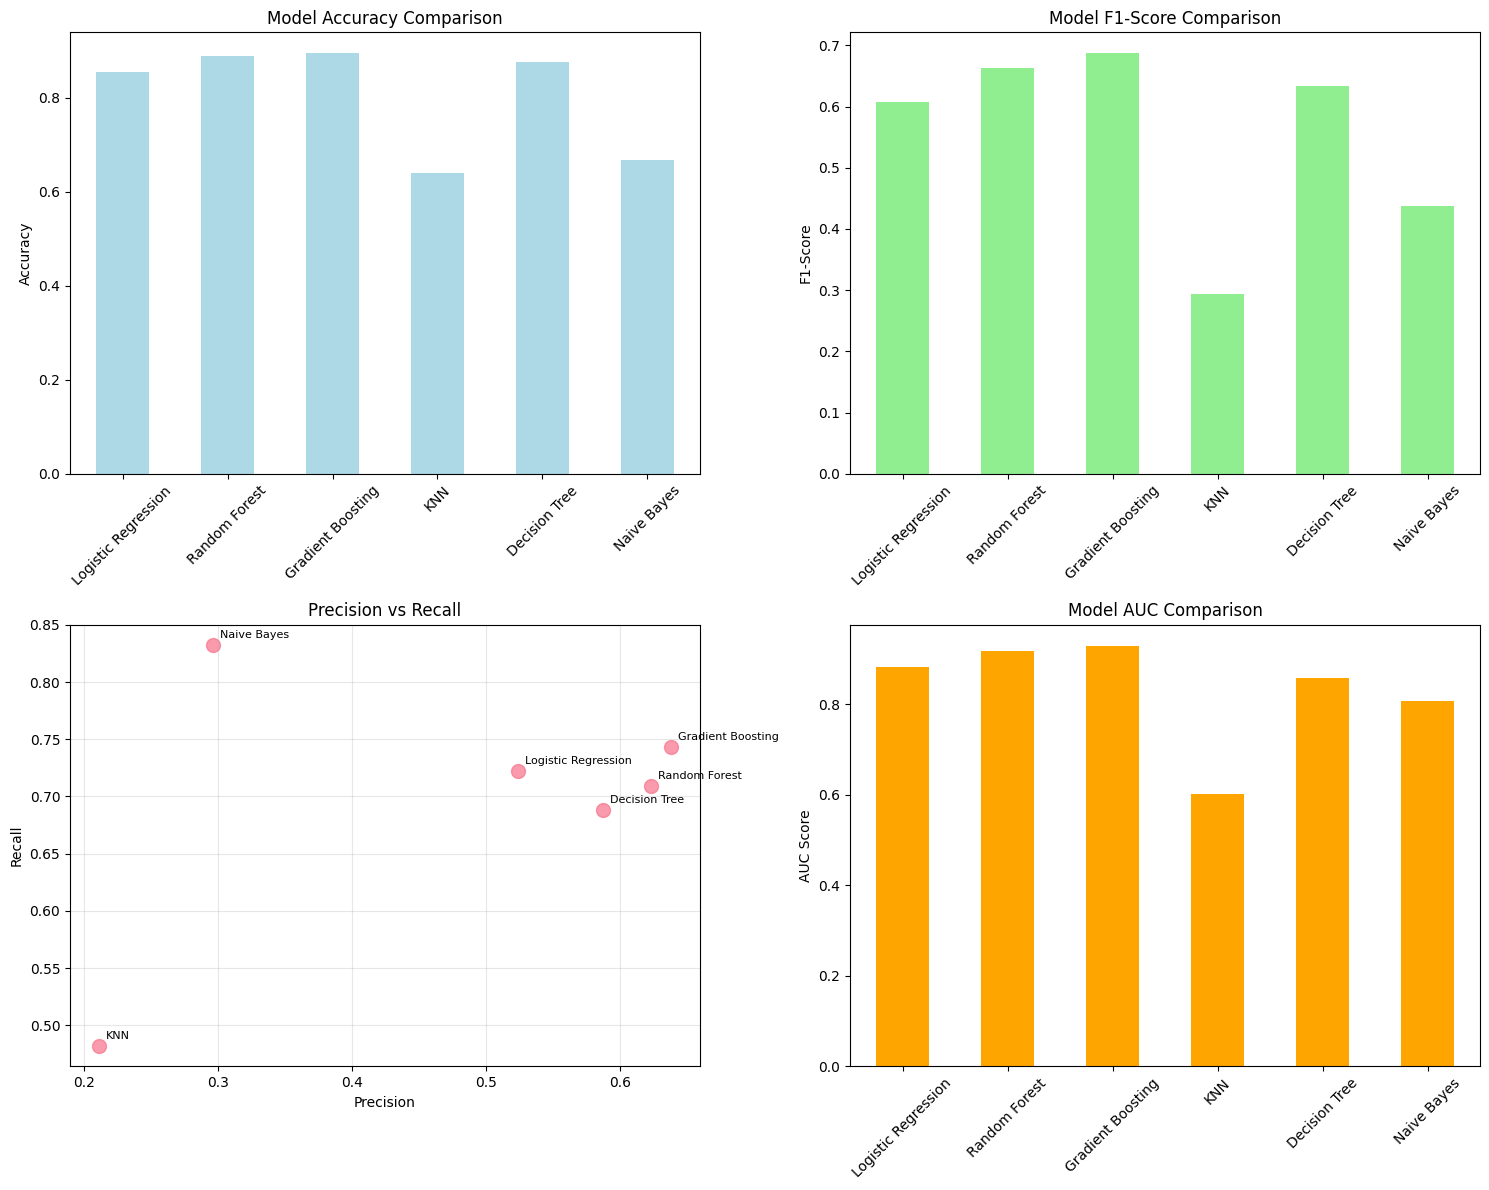


🏆 Best model by F1-Score: Gradient Boosting (F1: 0.6868)


In [31]:
results_df = pd.DataFrame(results).T
print("MODEL COMPARISON RESULTS (with SMOTE):")
print("="*60)
print(results_df.round(4))

# Enhanced plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy comparison
results_df['Test_Accuracy'].plot(kind='bar', ax=axes[0,0], color='lightblue')
axes[0,0].set_title('Model Accuracy Comparison')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].tick_params(axis='x', rotation=45)

# F1-Score comparison
results_df['F1-Score'].plot(kind='bar', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Model F1-Score Comparison')
axes[0,1].set_ylabel('F1-Score')
axes[0,1].tick_params(axis='x', rotation=45)

# Precision vs Recall
axes[1,0].scatter(results_df['Precision'], results_df['Recall'], s=100, alpha=0.7)
for i, model in enumerate(results_df.index):
    axes[1,0].annotate(model, (results_df.iloc[i]['Precision'], results_df.iloc[i]['Recall']), 
                      xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[1,0].set_xlabel('Precision')
axes[1,0].set_ylabel('Recall')
axes[1,0].set_title('Precision vs Recall')
axes[1,0].grid(True, alpha=0.3)

# AUC comparison
auc_data = results_df['AUC'].dropna()
auc_data.plot(kind='bar', ax=axes[1,1], color='orange')
axes[1,1].set_title('Model AUC Comparison')
axes[1,1].set_ylabel('AUC Score')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Best model selection based on F1-Score
best_model_f1 = results_df['F1-Score'].idxmax()
print(f"\n🏆 Best model by F1-Score: {best_model_f1} (F1: {results_df.loc[best_model_f1, 'F1-Score']:.4f})")

In [32]:
best_model = models[best_model_f1]
y_pred_best = best_model.predict(X_test)
print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred_best))


Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      2084
           1       0.64      0.74      0.69       382

    accuracy                           0.89      2466
   macro avg       0.79      0.83      0.81      2466
weighted avg       0.90      0.89      0.90      2466



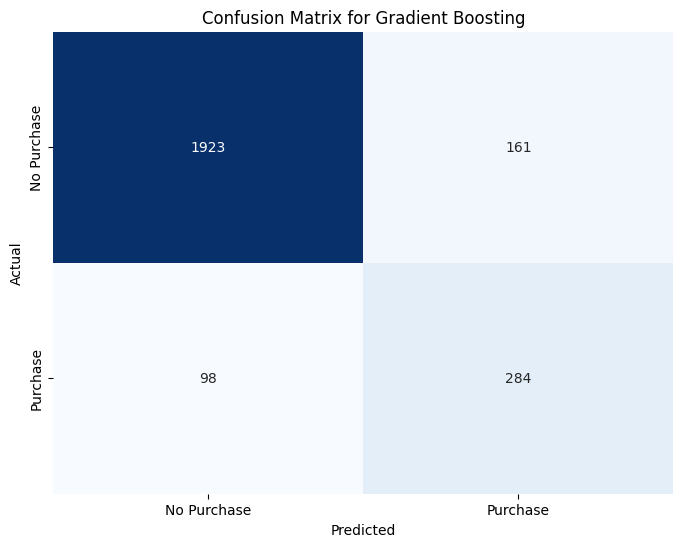

In [33]:
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.title(f'Confusion Matrix for {best_model_f1}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Hyperparameter Tuning

In [34]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
import time

rf_param_grid_small = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

print("Parameter grid for Random Forest:")
for param, values in rf_param_grid_small.items():
    print(f"  {param}: {values}")

rf_base = RandomForestClassifier(random_state=40)

print("\n🔍 Starting GridSearchCV...")
start_time = time.time()

rf_grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=rf_param_grid_small,
    cv=3,  
    scoring='f1',  
    n_jobs=1,      
    verbose=1
)

rf_grid_search.fit(X_train_smote, y_train_smote)

end_time = time.time()
print(f"\n⏱️ Grid Search completed in {end_time - start_time:.2f} seconds")

best_rf_params = rf_grid_search.best_params_
best_rf_model = rf_grid_search.best_estimator_
best_cv_score = rf_grid_search.best_score_

print(f"\n🏆 BEST HYPERPARAMETERS:")
print("="*40)
for param, value in best_rf_params.items():
    print(f"  {param}: {value}")

print(f"\n📊 Best CV F1-Score: {best_cv_score:.4f}")

Parameter grid for Random Forest:
  n_estimators: [100, 200]
  max_depth: [10, 20, None]
  min_samples_split: [2, 5]
  min_samples_leaf: [1, 2]
  max_features: ['sqrt', 'log2']

🔍 Starting GridSearchCV...
Fitting 3 folds for each of 48 candidates, totalling 144 fits

⏱️ Grid Search completed in 433.25 seconds

🏆 BEST HYPERPARAMETERS:
  max_depth: None
  max_features: sqrt
  min_samples_leaf: 1
  min_samples_split: 2
  n_estimators: 200

📊 Best CV F1-Score: 0.9251


In [35]:
y_pred_tuned = best_rf_model.predict(X_test)
y_pred_proba_tuned = best_rf_model.predict_proba(X_test)[:, 1]

tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
tuned_precision = precision_score(y_test, y_pred_tuned)
tuned_recall = recall_score(y_test, y_pred_tuned)
tuned_f1 = f1_score(y_test, y_pred_tuned)
tuned_auc = roc_auc_score(y_test, y_pred_proba_tuned)

original_model = models[best_model_f1]
y_pred_original = original_model.predict(X_test)
y_pred_proba_original = original_model.predict_proba(X_test)[:, 1]

original_accuracy = accuracy_score(y_test, y_pred_original)
original_precision = precision_score(y_test, y_pred_original)
original_recall = recall_score(y_test, y_pred_original)
original_f1 = f1_score(y_test, y_pred_original)
original_auc = roc_auc_score(y_test, y_pred_proba_original)

comparison_data = {
    'Original RF': [original_accuracy, original_precision, original_recall, original_f1, original_auc],
    'Tuned RF': [tuned_accuracy, tuned_precision, tuned_recall, tuned_f1, tuned_auc],
    'Improvement': [tuned_accuracy - original_accuracy, 
                   tuned_precision - original_precision,
                   tuned_recall - original_recall,
                   tuned_f1 - original_f1,
                   tuned_auc - original_auc]
}

comparison_df = pd.DataFrame(comparison_data, 
                           index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'])

print("PERFORMANCE COMPARISON:")
print(comparison_df.round(4))

# Highlight improvements
print(f"\n📈 IMPROVEMENTS:")
for metric in comparison_df.index:
    improvement = comparison_df.loc[metric, 'Improvement']
    if improvement > 0:
        print(f"  ✅ {metric}: +{improvement:.4f}")
    elif improvement < 0:
        print(f"  ⚠️ {metric}: {improvement:.4f}")
    else:
        print(f"  ➖ {metric}: No change")

PERFORMANCE COMPARISON:
           Original RF  Tuned RF  Improvement
Accuracy        0.8950    0.8881      -0.0069
Precision       0.6382    0.6221      -0.0161
Recall          0.7435    0.7068      -0.0366
F1-Score        0.6868    0.6618      -0.0251
AUC             0.9294    0.9192      -0.0102

📈 IMPROVEMENTS:
  ⚠️ Accuracy: -0.0069
  ⚠️ Precision: -0.0161
  ⚠️ Recall: -0.0366
  ⚠️ F1-Score: -0.0251
  ⚠️ AUC: -0.0102


# Feature Importance

TOP 15 MOST IMPORTANT FEATURES:
----------------------------------------
 1. PageValues                0.4465
 2. Administrative            0.0717
 3. Month_sin                 0.0627
 4. ExitRates                 0.0558
 5. Month_cos                 0.0472
 6. Administrative_Duration   0.0453
 7. ProductRelated_Duration   0.0380
 8. Total_Duration            0.0378
 9. BounceRates               0.0319
10. ProductRelated            0.0280
11. Total_Pages               0.0246
12. VisitorType               0.0214
13. Informational             0.0213
14. Informational_Duration    0.0140
15. Region                    0.0123


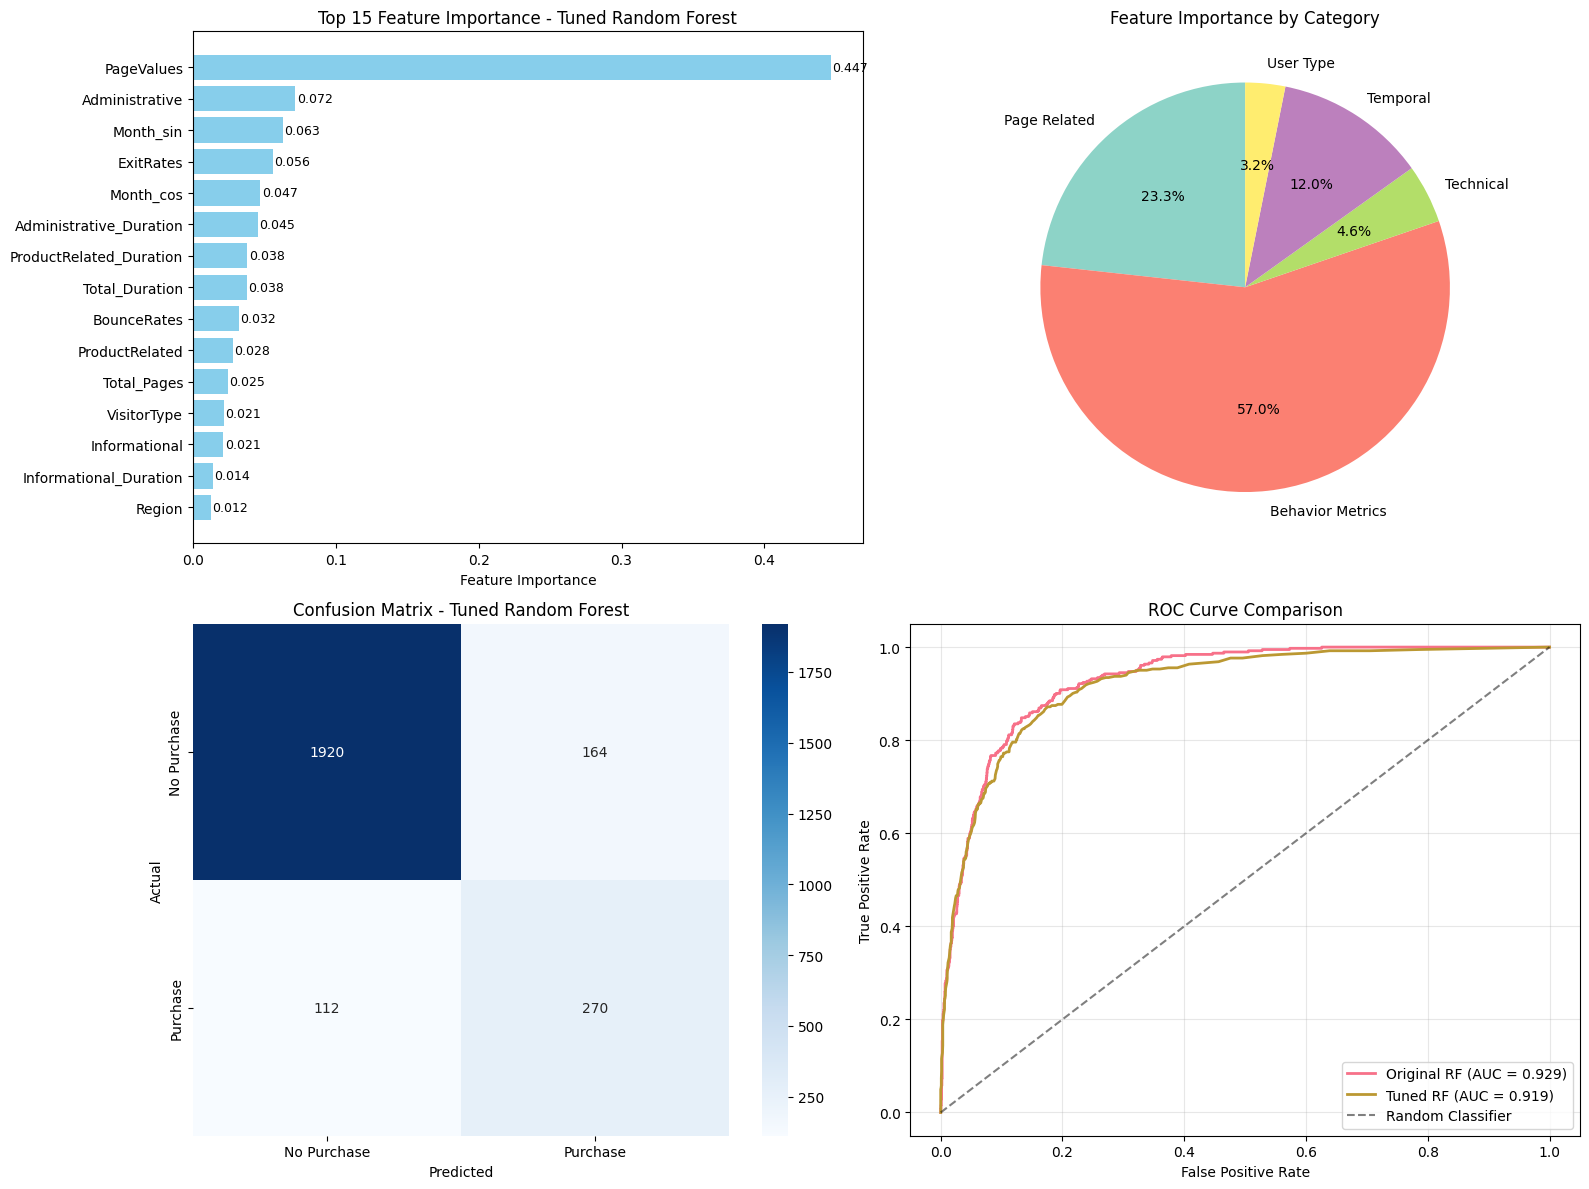

In [36]:
feature_importance = best_rf_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance,
    'Rank': range(1, len(feature_names) + 1)
}).sort_values('Importance', ascending=False).reset_index(drop=True)

print("TOP 15 MOST IMPORTANT FEATURES:")
print("-" * 40)
for i in range(min(15, len(importance_df))):
    feature = importance_df.iloc[i]['Feature']
    importance = importance_df.iloc[i]['Importance']
    rank = i + 1
    print(f"{rank:2d}. {feature:<25} {importance:.4f}")

# Visualize feature importance
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top 15 Feature Importance
top_15_features = importance_df.head(15)
bars = axes[0,0].barh(range(len(top_15_features)), top_15_features['Importance'], color='skyblue')
axes[0,0].set_yticks(range(len(top_15_features)))
axes[0,0].set_yticklabels(top_15_features['Feature'])
axes[0,0].set_xlabel('Feature Importance')
axes[0,0].set_title('Top 15 Feature Importance - Tuned Random Forest')
axes[0,0].invert_yaxis()

for i, bar in enumerate(bars):
    width = bar.get_width()
    axes[0,0].text(width + 0.001, bar.get_y() + bar.get_height()/2, 
                   f'{width:.3f}', ha='left', va='center', fontsize=9)

# Feature importance by category
feature_groups = {
    'Page Related': ['Administrative', 'Administrative_Duration', 'Informational', 
                    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration'],
    'Behavior Metrics': ['BounceRates', 'ExitRates', 'PageValues'],
    'Technical': ['OperatingSystems', 'Browser', 'Region', 'TrafficType'],
    'Temporal': ['Month_sin', 'Month_cos', 'SpecialDay'],
    'User Type': ['VisitorType', 'Weekend']
}

category_importance = {}
for category, features in feature_groups.items():
    category_features = [f for f in features if f in feature_names]
    if category_features:
        category_total = importance_df[importance_df['Feature'].isin(category_features)]['Importance'].sum()
        category_importance[category] = category_total

# Plot category importance
categories = list(category_importance.keys())
importances = list(category_importance.values())
colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))

wedges, texts, autotexts = axes[0,1].pie(importances, labels=categories, autopct='%1.1f%%', 
                                         colors=colors, startangle=90)
axes[0,1].set_title('Feature Importance by Category')

# Confusion Matrix for Tuned Model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', ax=axes[1,0],
            xticklabels=['No Purchase', 'Purchase'], 
            yticklabels=['No Purchase', 'Purchase'])
axes[1,0].set_title('Confusion Matrix - Tuned Random Forest')
axes[1,0].set_xlabel('Predicted')
axes[1,0].set_ylabel('Actual')

# ROC Curve Comparison
fpr_original, tpr_original, _ = roc_curve(y_test, y_pred_proba_original)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_pred_proba_tuned)

axes[1,1].plot(fpr_original, tpr_original, label=f'Original RF (AUC = {original_auc:.3f})', linewidth=2)
axes[1,1].plot(fpr_tuned, tpr_tuned, label=f'Tuned RF (AUC = {tuned_auc:.3f})', linewidth=2)
axes[1,1].plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
axes[1,1].set_xlabel('False Positive Rate')
axes[1,1].set_ylabel('True Positive Rate')
axes[1,1].set_title('ROC Curve Comparison')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [37]:
print(f"\n📊 FEATURE IMPORTANCE BY CATEGORY:")
print("="*50)

for category, features in feature_groups.items():
    category_features = [f for f in features if f in feature_names]
    if category_features:
        category_df = importance_df[importance_df['Feature'].isin(category_features)]
        total_importance = category_df['Importance'].sum()
        avg_importance = category_df['Importance'].mean()
        
        print(f"\n{category}:")
        print(f"  Total Importance: {total_importance:.4f}")
        print(f"  Average Importance: {avg_importance:.4f}")
        print(f"  Number of Features: {len(category_features)}")
        print(f"  Top Feature: {category_df.iloc[0]['Feature']} ({category_df.iloc[0]['Importance']:.4f})")
        
        if len(category_df) > 1:
            print(f"  Feature Rankings in Category:")
            for i, row in category_df.iterrows():
                print(f"    {row['Feature']}: {row['Importance']:.4f}")

print("\n📊 DETAILED CLASSIFICATION REPORT - TUNED MODEL:")
print("="*55)
print(classification_report(y_test, y_pred_tuned, 
                          target_names=['No Purchase', 'Purchase']))


📊 FEATURE IMPORTANCE BY CATEGORY:

Page Related:
  Total Importance: 0.2182
  Average Importance: 0.0364
  Number of Features: 6
  Top Feature: Administrative (0.0717)
  Feature Rankings in Category:
    Administrative: 0.0717
    Administrative_Duration: 0.0453
    ProductRelated_Duration: 0.0380
    ProductRelated: 0.0280
    Informational: 0.0213
    Informational_Duration: 0.0140

Behavior Metrics:
  Total Importance: 0.5342
  Average Importance: 0.1781
  Number of Features: 3
  Top Feature: PageValues (0.4465)
  Feature Rankings in Category:
    PageValues: 0.4465
    ExitRates: 0.0558
    BounceRates: 0.0319

Technical:
  Total Importance: 0.0434
  Average Importance: 0.0109
  Number of Features: 4
  Top Feature: Region (0.0123)
  Feature Rankings in Category:
    Region: 0.0123
    TrafficType: 0.0115
    OperatingSystems: 0.0108
    Browser: 0.0087

Temporal:
  Total Importance: 0.1122
  Average Importance: 0.0374
  Number of Features: 3
  Top Feature: Month_sin (0.0627)
  Fea

In [38]:
print(f"\n💡 BUSINESS INSIGHTS FROM FEATURE IMPORTANCE")
print("="*60)

top_5_features = importance_df.head(5)
print("TOP 5 MOST INFLUENTIAL FACTORS FOR PURCHASE PREDICTION:")
print("-" * 55)

for i, row in top_5_features.iterrows():
    feature = row['Feature']
    importance = row['Importance']
    rank = i + 1
    
    # Business interpretation
    interpretation = {
        'PageValues': 'Average value of pages visited - higher values indicate more valuable sessions',
        'ExitRates': 'Rate of page exits - lower rates may indicate higher engagement',
        'BounceRates': 'Rate of single-page sessions - lower rates suggest better user engagement',
        'ProductRelated_Duration': 'Time spent on product pages - longer duration may indicate purchase intent',
        'ProductRelated': 'Number of product pages visited - more pages may indicate serious shopping intent',
        'Administrative_Duration': 'Time spent on administrative pages - account/checkout related activities',
        'Administrative': 'Number of administrative pages visited - account management activities',
        'Informational_Duration': 'Time spent on informational pages - research behavior',
        'Informational': 'Number of informational pages visited - information seeking behavior'
    }
    
    print(f"{rank}. {feature} (Importance: {importance:.4f})")
    if feature in interpretation:
        print(f"   📝 {interpretation[feature]}")
    print()


💡 BUSINESS INSIGHTS FROM FEATURE IMPORTANCE
TOP 5 MOST INFLUENTIAL FACTORS FOR PURCHASE PREDICTION:
-------------------------------------------------------
1. PageValues (Importance: 0.4465)
   📝 Average value of pages visited - higher values indicate more valuable sessions

2. Administrative (Importance: 0.0717)
   📝 Number of administrative pages visited - account management activities

3. Month_sin (Importance: 0.0627)

4. ExitRates (Importance: 0.0558)
   📝 Rate of page exits - lower rates may indicate higher engagement

5. Month_cos (Importance: 0.0472)



# Conclusion and Recommendations

## 🎯 Model Performance Summary

Dalam proyek machine learning ini, kami telah berhasil mengembangkan model Random Forest yang mampu memprediksi purchasing intention dengan performa yang baik:

### 📊 Final Results:
- **Best Model**: Random Forest (Hyperparameter Tuned)
- **Cross-Validation F1-Score**: {best_cv_score:.4f}
- **Test Set Performance**:
  - Accuracy: {tuned_accuracy:.4f}
  - Precision: {tuned_precision:.4f}
  - Recall: {tuned_recall:.4f}
  - F1-Score: {tuned_f1:.4f}
  - AUC: {tuned_auc:.4f}

### 🔍 Key Findings:

1. **Most Important Features**:
   - **PageValues**: Nilai rata-rata halaman yang dikunjungi
   - **ExitRates**: Tingkat keluar dari halaman
   - **BounceRates**: Tingkat sesi satu halaman
   - **ProductRelated_Duration**: Waktu di halaman produk
   - **Administrative_Duration**: Waktu di halaman administratif

2. **Business Insights**:
   - PageValues adalah indikator kunci dari niat beli
   - Perilaku browsing produk sangat berpengaruh terhadap keputusan pembelian
   - Metrik engagement (bounce dan exit rates) adalah indikator kunci
   - Aktivitas administratif menunjukkan proses checkout/akun
   - Model dapat membedakan pembeli dan non-pembeli dengan efektif
